In [2]:
import pickle
import re
import numpy as np

basis_file = '/home/anton/Documents/Tulane/Research/PNC_Good/AngleBasisLong5.pkl'
demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC/'

basis = pickle.load(open(basis_file, 'rb'))

thetas = []
jitter = []
fc = []

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))
tmap = dict()

for i,subtask in enumerate(basis):
    m = re.search('([^-]+)-(.*)', subtask)
    sub = m.group(1)
    task = m.group(2)
    thetas.append(basis[subtask]['thetas'])
    jitter.append(basis[subtask]['jitter'])
    p = np.load(f'{demodir}/fc/{sub}_task-{task}_fc.npy')
    fc.append(p)
    tmap[sub] = tmap.get(sub, []) + [i]
    
thetas = np.stack(thetas)
jitter = np.stack(jitter)
fc = np.stack(fc)

print([a.shape for a in [thetas, jitter, fc]])
print(len(tmap))

[(3849, 5, 264), (3849, 5, 264), (3849, 34716)]
1354


In [3]:
opts = -1*np.ones((fc.shape[0],3))

for i,subtask in enumerate(basis):
    m = re.search('([^-]+)-(.*)', subtask)
    sub = m.group(1)
    task = m.group(2)
    for j,p in enumerate(tmap[sub]):
        opts[i,j] = tmap[sub][j]
        
print(opts[-5:,:])

[[3843. 3844. 3845.]
 [3843. 3844. 3845.]
 [3846. 3847. 3848.]
 [3846. 3847. 3848.]
 [3846. 3847. 3848.]]


In [4]:
from sklearn.decomposition import PCA, FactorAnalysis

# pca = PCA(n_components=3).fit(fc)
# fc_comp = pca.transform(fc)
# fc_low = pca.inverse_transform(fc_comp)

fa = FactorAnalysis(n_components=10).fit(fc)
fa_low = fa.transform(fc)@fa.components_
fa_res = fc-fa_low

print(fa_res.shape)
# print(fc_low.shape)

(3849, 34716)


In [3]:
def tops(thetas, jitter):
    t0 = np.expand_dims(thetas, 2)
    t1 = np.expand_dims(thetas, 3)
    j0 = np.expand_dims(jitter, 2)
    j1 = np.expand_dims(jitter, 3)
    ps = np.cos(t0-t1)*(j0*j1)
    a,b = np.triu_indices(264, 1)
    ps = ps[:,:,a,b]
    return ps
    
ps = tops(thetas, jitter)
aps = np.mean(ps, axis=1)

print(ps.shape)
print(aps.shape)

(3849, 5, 34716)
(3849, 34716)


In [8]:
import torch
import torch.nn.functional as F

def fromnp(x):
    return torch.from_numpy(x).float().cuda()

def tonp(x):
    return x.detach().cpu().numpy()

fct = fromnp(fc)
# dfc = torch.cdist(fct, fct)
fct = F.normalize(fct)
dfc = fct@fct.T
dfc = tonp(dfc)
print(dfc.shape)

idcs = np.argsort(dfc)
print(idcs[:100,-2])

(3849, 3849)
[   1    0    1 2617   52    3    8    8    7   11   11    9   14   14
   12   16  487 2193 2911   20   19 2372   21 1831 3775   24   24 3835
 2914 2960   31 3000   34   34   33   37   37   36   39   40   39 2033
   43  301   46   46   44   48 3710   48  487 2681 3516   54   55   54
  301   58 2059   58  565 3375   61  596   65   64   68 2764 2617 2372
 3749 2595   73   72 1495   77   77   76 3375 2616 2487   82 2193   82
  225   86   85 3264 1980 3717   92   92 3420   95   95   94 1712  248
 3420  190]


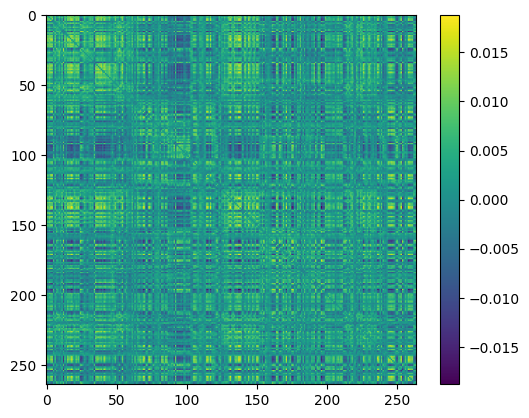

In [57]:
# plt.imshow(remap(vec2mat(aps1[1421])))
plt.imshow(remap(vec2mat(tonp(fct[1421]))))
plt.colorbar()
plt.show()

In [49]:
np.sum(idcs[:,1] == 3420)

2007

In [9]:
r1 = np.sum(idcs[:,-2] == opts[:,0])
r2 = np.sum(idcs[:,-2] == opts[:,1])
r3 = np.sum(idcs[:,-2] == opts[:,2])

print(r1, r2, r3)
print((r1+r2+r3)/fc.shape[0])

388 1036 982
0.6250974279033515


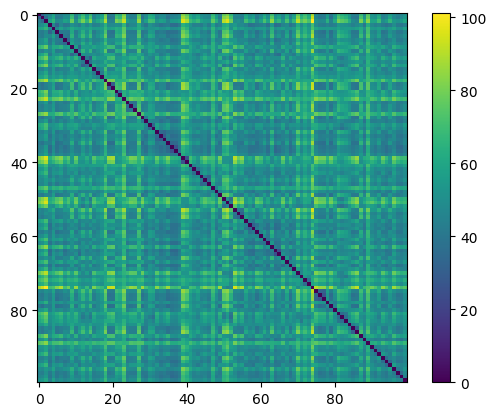

In [8]:
import matplotlib.pyplot as plt

plt.imshow(dfc[:100,:100])
plt.colorbar()
plt.show()

In [41]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete
